In [ ]:
! wget https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
! chmod +x Miniconda3-py37_4.8.2-Linux-x86_64.sh
! bash ./Miniconda3-py37_4.8.2-Linux-x86_64.sh -b -f -p /usr/local
! conda install -c rdkit rdkit -y
import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')

--2021-03-12 15:43:12--  https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.131.3, 104.16.130.3, 2606:4700::6810:8203, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.131.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 85055499 (81M) [application/x-sh]
Saving to: ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh’

Miniconda3-py37_4.8 100%[===================>]  81.12M   159MB/s    in 0.5s    

2021-03-12 15:43:13 (159 MB/s) - ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh’ saved [85055499/85055499]

PREFIX=/usr/local
Unpacking payload ...
Solving environment: \ | done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - _libgcc_mutex==0.1=main
    - asn1crypto==1.3.0=py37_0
    - ca-certificates==2020.1.1=0
    - certifi==2019.11.28=py37_0
    - cffi==1.14.0=py37h2e261b9_0
    - chardet==3.0.4=py37_1003
    - conda-package-handling==1.6.0=py37h

In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving ch05_compounds.sdf to ch05_compounds.sdf
User uploaded file "ch05_compounds.sdf" with length 96523 bytes


In [ ]:
from rdkit.Chem import PandasTools

In [ ]:
df = PandasTools.LoadSDF("ch05_compounds.sdf")

In [ ]:
import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')

In [ ]:
from rdkit.Chem import PandasTools
from rdkit.Chem import Draw
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole

In [ ]:
from IPython.display import SVG
im=Draw.MolsToGridImage(df.ROMol.tolist(), useSVG=True,molsPerRow=5)


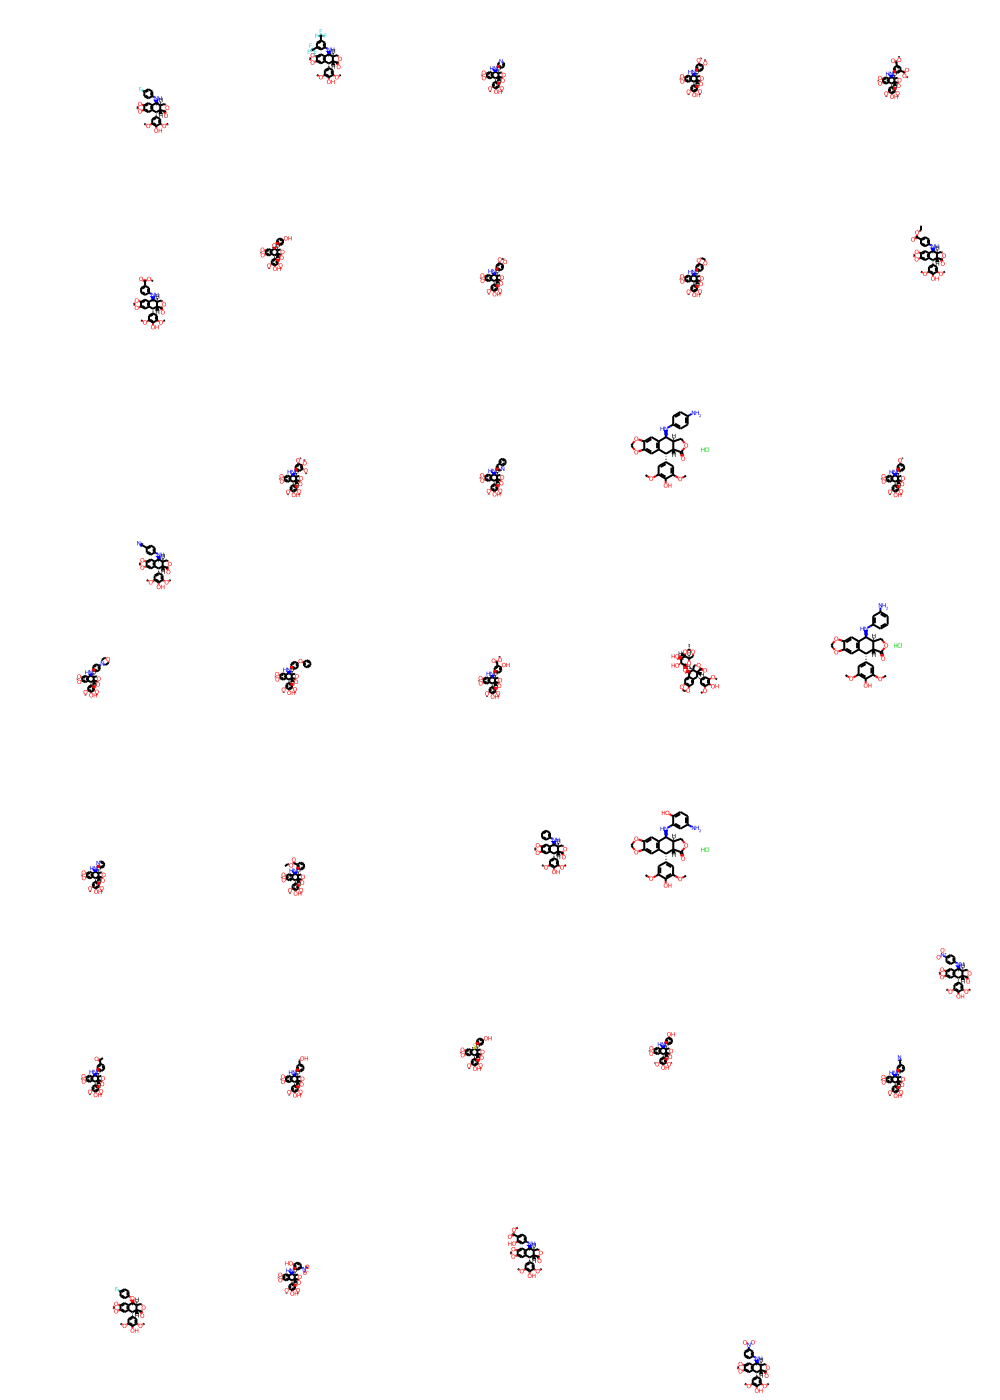

In [ ]:
im

,chembl_id,ID,ROMol
0,CHEMBL281692,,
1,CHEMBL430726,,
2,CHEMBL281430,,

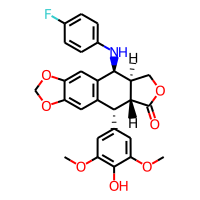
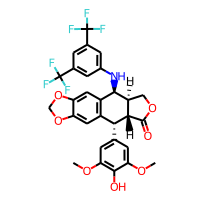
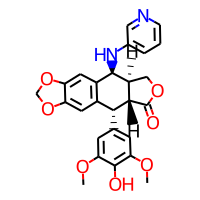

In [ ]:
df.head(3)

In [ ]:
from rdkit.Chem import rdDepictor

In [ ]:
_ = [rdDepictor.Compute2DCoords(x) for x in df.ROMol]

In [ ]:
im=Draw.MolsToGridImage(df.ROMol.tolist(), useSVG=True,molsPerRow=5)


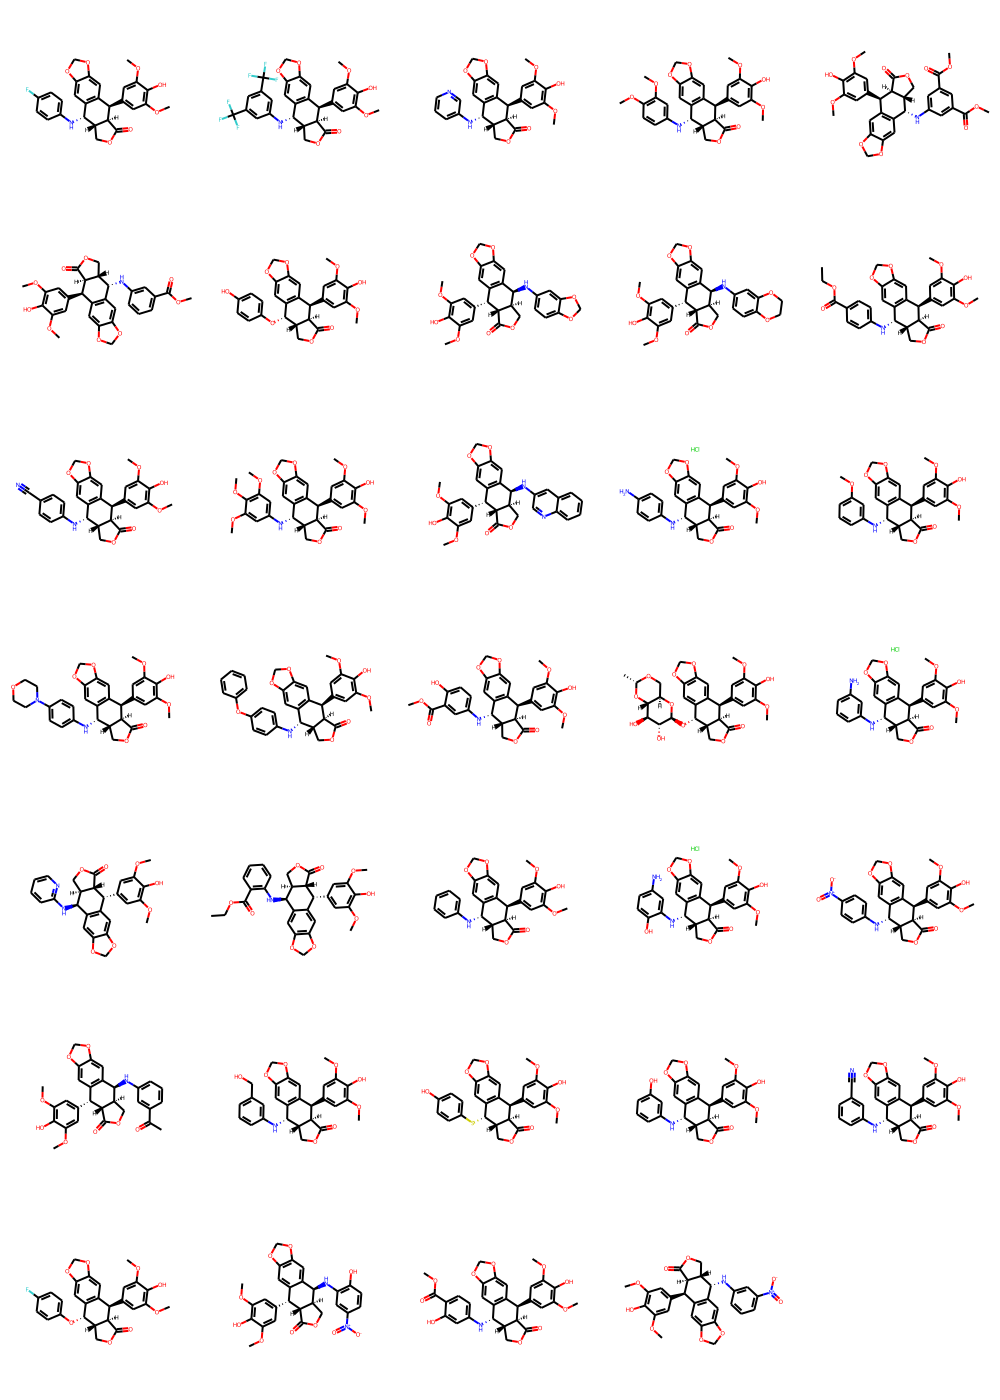

In [ ]:
im

In [ ]:
from rdkit.Chem import rdFMCS

In [ ]:
res = rdFMCS.FindMCS(df.ROMol, completeRingsOnly=True, atomCompare=rdFMCS.AtomCompare.CompareAny)

In [ ]:
MCS = Chem.MolFromSmarts(res.smartsString)
rdDepictor.Compute2DCoords(MCS)
MCS

RDKit ERROR: [11:49:49] Aromatic bonds on non aromatic atom 22


AtomKekulizeException: ignored

In [ ]:
from rdkit import Chem, DataStructs
from rdkit.Chem import AllChem, Draw
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.decomposition import PCA
import os
import matplotlib.pyplot as plt

In [ ]:
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats
%matplotlib inline
set_matplotlib_formats('svg')
sns.set(rc={'figure.figsize':(12,8)},font_scale=1.5)
sns.set_style('ticks')

In [ ]:
oxrs = [("CHEMBL3098111", "Merck" ),  ("CHEMBL3867477", "Merck" ),  ("CHEMBL2380240", "Rottapharm" ),
             ("CHEMBL3352684", "Merck" ),  ("CHEMBL3769367", "Merck" ),  ("CHEMBL3526050", "Actelion" ),
             ("CHEMBL3112474", "Actelion" ),  ("CHEMBL3739366", "Heptares" ),  ("CHEMBL3739395", "Actelion" ),
             ("CHEMBL3351489", "Eisai" )]

In [ ]:
fps = []
docs = []
companies = []

for cid, company in oxrs:
    sdf_file = os.path.join("ch08", cid + ".sdf")
    mols = Chem.SDMolSupplier(sdf_file)
    for mol in mols:
        if mol is not None:
            fp = AllChem.GetMorganFingerprintAsBitVect(mol, 2)
            arr = np.zeros((1,))
            DataStructs.ConvertToNumpyArray(fp, arr)
            docs.append(cid)
            companies.append(company)
            fps.append(arr)
fps = np.array(fps)
companies = np.array(companies)
docs = np.array(docs)

RDKit ERROR: [11:57:40] ERROR: Counts line too short: '' on line90
RDKit ERROR: [11:57:40] ERROR: moving to the beginning of the next molecule
RDKit ERROR: [11:57:40] ERROR: Counts line too short: '$$$$' on line175
RDKit ERROR: [11:57:40] ERROR: moving to the beginning of the next molecule
RDKit ERROR: [11:57:40] ERROR: Counts line too short: '$$$$' on line180
RDKit ERROR: [11:57:40] ERROR: moving to the beginning of the next molecule
RDKit ERROR: [11:57:40] ERROR: Counts line too short: '$$$$' on line185
RDKit ERROR: [11:57:40] ERROR: moving to the beginning of the next molecule
RDKit ERROR: [11:57:40] ERROR: Counts line too short: '$$$$' on line190
RDKit ERROR: [11:57:40] ERROR: moving to the beginning of the next molecule
RDKit ERROR: [11:57:40] ERROR: Counts line too short: '$$$$' on line195
RDKit ERROR: [11:57:40] ERROR: moving to the beginning of the next molecule
RDKit ERROR: [11:57:40] ERROR: Counts line too short: '$$$$' on line200
RDKit ERROR: [11:57:40] ERROR: moving to the 

In [ ]:
fps.shape

(293, 2048)

In [ ]:
pca = PCA(n_components=2)
x = pca.fit_transform(fps)

In [ ]:
d = pd.DataFrame(x)
d.columns = ["PC1", "PC2"]
d["DOCID"] = docs
d["COMPANY"] = companies

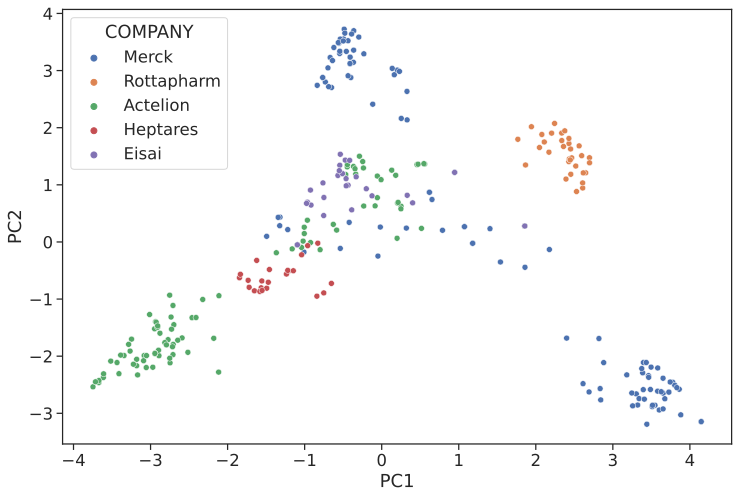

In [ ]:
ax = sns.scatterplot(x="PC1", y="PC2", hue="COMPANY", data=d)

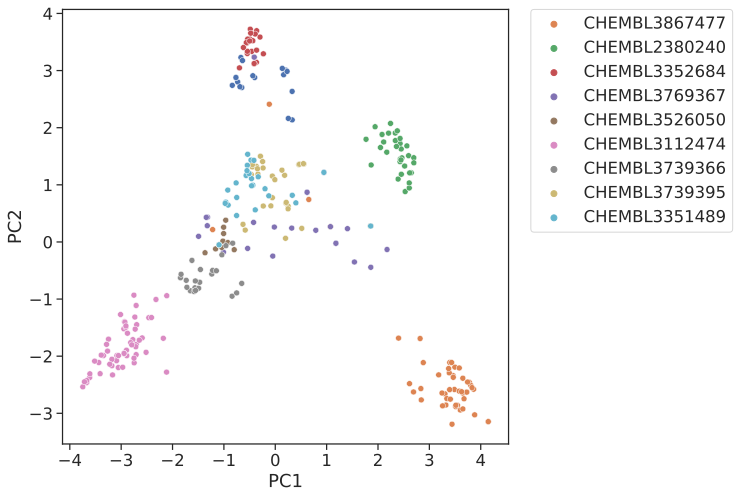

In [ ]:
sns.set(rc={'figure.figsize':(8,8)},font_scale=1.5)
sns.set_style('ticks')
ax = sns.scatterplot(x="PC1", y="PC2", hue="DOCID", data=d)
handles, labels = ax.get_legend_handles_labels()
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., handles=handles[1:], labels=labels[1:])

In [ ]:
from sklearn.manifold import TSNE

In [ ]:
tsne = TSNE(n_components=2, random_state=0)
tx = tsne.fit_transform(fps)

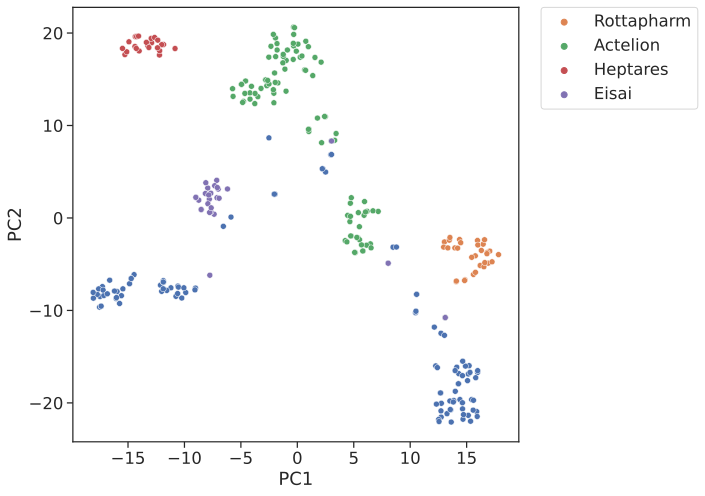

In [ ]:
d = pd.DataFrame(tx)
d.columns = ["PC1", "PC2"]
d["DOCID"] = docs
d["COMPANY"] = companies
ax = sns.scatterplot(x="PC1", y="PC2", hue="COMPANY", data=d)
handles, labels = ax.get_legend_handles_labels()
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., handles=handles[1:], labels=labels[1:])

In [ ]:
!pip install minisom

  Created wheel for minisom: filename=MiniSom-2.2.7-py3-none-any.whl size=8606 sha256=1390dcc8755fc602f06ebe87cc45fe7f9e257725b8b129ea07694314aa7769fc
  Stored in directory: /root/.cache/pip/wheels/b9/32/90/b7e7953eeb50b9880bd01bcdbf832bf9550a54d834996f858c
Successfully built minisom


In [ ]:
from collections import Counter
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib.gridspec import GridSpec
from rdkit import Chem
from rdkit.Chem import AllChem, MACCSkeys, Draw
from rdkit import DataStructs
import numpy as np
from tqdm import tqdm
from minisom import MiniSom
import sys
from time import time
import math

In [ ]:
%matplotlib inline

In [ ]:
def maccs_as_np(mol):
    """
    Generate MACCS fingerprints as a NumPy array
    :param mol: input molecule
    :return: fingerprint as a NumPy array
    """
    bv = MACCSkeys.GenMACCSKeys(mol)
    return np.array([int(x) for x in list(bv.ToBitString())], dtype=np.float32)


def morgan_as_np(mol):
    """
    Generate a 1024 bit Morgan fingerprint as a NumPy array
    :param mol: input molecule
    :return: fingerprint as a NumPy array
    """
    bv = AllChem.GetMorganFingerprintAsBitVect(mol, 3, nBits=1024)
    arr = np.zeros((1,), dtype=np.float32)
    DataStructs.ConvertToNumpyArray(bv, arr)
    return arr


def generate_fps(smiles_list, fp_function=maccs_as_np):
    """
    Take a list of SMILES as input and return a list of NumPy arrays
    :param smiles_list: list of SMILES
    :param fp_function: function to calculate fingerprints
    :return: list of NumPy arrays containing fingerprints
    """
    output_fp_list = []
    for smiles in tqdm(smiles_list, desc="Generating Fingerprints"):
        output_fp_list.append(fp_function(Chem.MolFromSmiles(smiles)))
    return output_fp_list

In [ ]:
# Adapted from the MiniSom example notebook
def depict_som(cluster_df, x_dim, y_dim, x_column="X", y_column="Y"):
    """
    Draw a SOM with each cell depicted as a pie chart
    :param cluster_df: data frame with SOM output, should have columns active, X, and Y
    :param x_dim: X dimension of the SOM
    :param y_dim: Y dimension of the SOM
    :return:
    """
    required_colums = [x_column, y_column, "active"]
    for col in required_colums:
        if col not in cluster_df.columns:
            print(f"Error {col} not in dataframe columns", file=sys.stderr)
            sys.exit(1)
    cell_dict = {}
    for k, v in [x for x in cluster_df.groupby([x_column, y_column])]:
        cell_dict[k] = Counter(v["active"])
        cell_names = cluster_df["active"].unique()
    plt.figure(figsize=(x_dim, y_dim))
    the_grid = GridSpec(x_dim, y_dim)
    for position in cell_dict.keys():
        label_fracs = [cell_dict[position][l] for l in cell_names]
        plt.subplot(the_grid[(x_dim - 1) - position[1], position[0]], aspect=1)
        patches, texts = plt.pie(label_fracs)

In [ ]:
def build_minisom_som(fp_list_in, x_dim=10, y_dim=10, num_iters=20000):
    """
    Build a SOM with MiniSom
    :param fp_list_in: input list of fingerprints as NumPy arrays
    :param x_dim: X dimension of the SOM
    :param y_dim: Y dimension of the SOM
    :param num_iters: number of iterations when building the SOM
    :return: lists with X and Y coordinates in the SOM
    """
    print("Training SOM")
    start_time = time()
    som = MiniSom(x_dim, y_dim, len(fp_list_in[0]), sigma=0.3, learning_rate=0.5, random_seed=1)
    som.train_random(fp_list_in, num_iters)
    x = []
    y = []
    # find best matching units
    print("Finding BMUs")
    for row in fp_list_in:
        x_val, y_val = som.winner(row)
        x.append(x_val)
        y.append(y_val)
    elapsed_time = time()-start_time
    print("Done\nElapsed time = %.2f sec" % elapsed_time)
    return x, y

In [ ]:
# read the input file into a dataframe
act_df = pd.read_csv("dude_erk2_mk01.csv")
# generate fingerprints
fp_list = generate_fps(act_df.SMILES)
# build the SOM
x_dim = 10
y_dim = 10
som_x, som_y = build_minisom_som(fp_list, x_dim, y_dim)
# set dataframe columns to SOM output
act_df["X"] = som_x
act_df["Y"] = som_y
# Draw the SOM
depict_som(act_df, x_dim, y_dim)

FileNotFoundError: ignored

In [ ]:
my_cell = act_df.query("X==6 and Y==4")

In [ ]:
my_smiles_list = [x[1] for x in sorted(zip(my_cell.active,my_cell.SMILES),reverse=True)]

In [ ]:
my_active_list = [x[0] for x in sorted(zip(my_cell.active,my_cell.SMILES),reverse=True)]
active_label_list = ["active" if a else "decoy" for a in my_active_list]

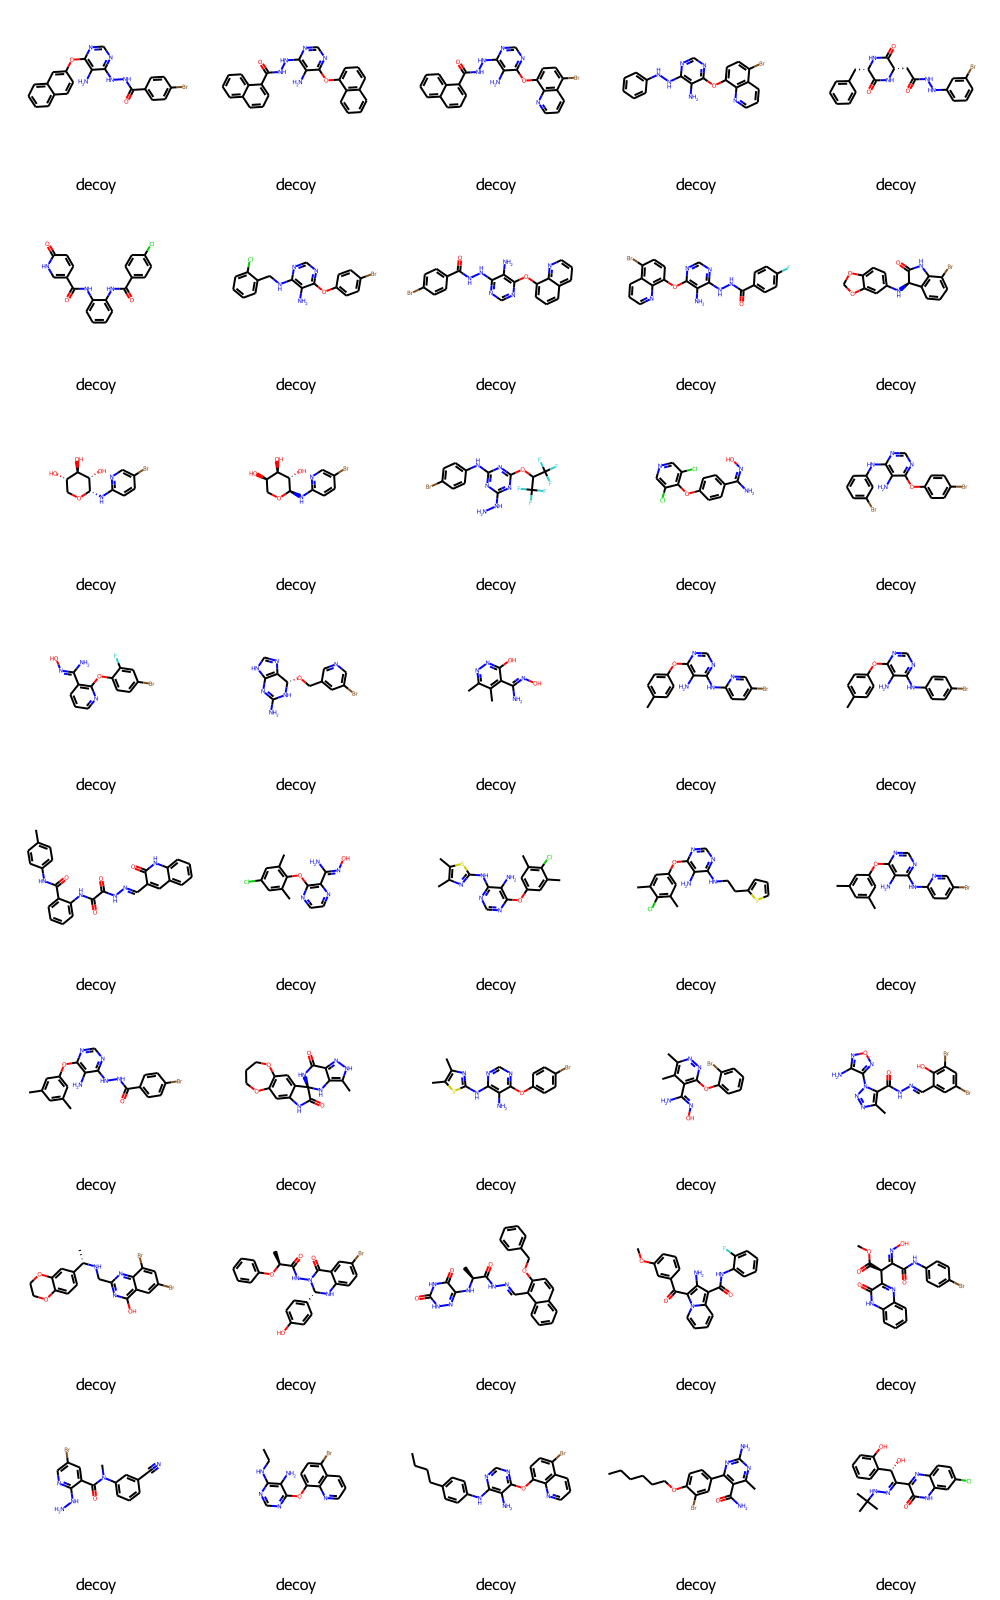

In [ ]:
Draw.MolsToGridImage([Chem.MolFromSmiles(x) for x in my_smiles_list],molsPerRow=5,legends=active_label_list)

Generating Fingerprints: 100%|██████████| 4629/4629 [00:01<00:00, 3162.98it/s]


Training SOM
Finding BMUs
Done
Elapsed time = 21.08 sec


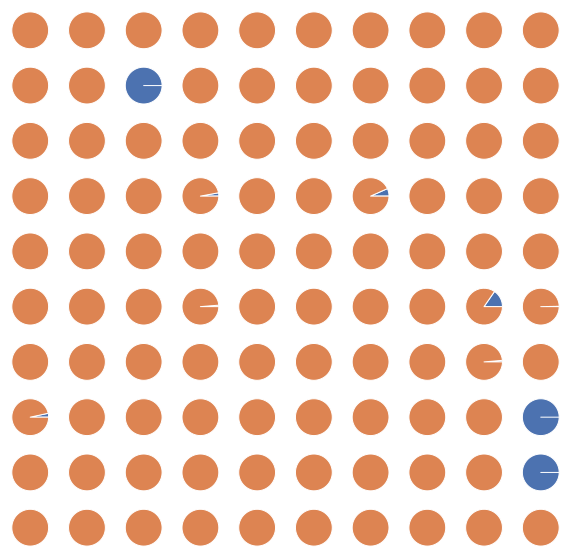

In [ ]:
morgan_list = generate_fps(act_df.SMILES,morgan_as_np)
x_dim = 10
y_dim = 10
morgan_x, morgan_y = build_minisom_som(morgan_list, x_dim, y_dim)
act_df["morgan_X"] = morgan_x
act_df["morgan_Y"] = morgan_y
depict_som(act_df, x_dim, y_dim, x_column="morgan_X",y_column="morgan_Y")

In [ ]:
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
import pandas as pd
from rdkit.Chem import PandasTools
from rdkit.Chem import Descriptors
from rdkit.Chem import rdmolops
import seaborn as sns

In [ ]:
active_df = pd.read_csv("mk01/actives_final.ism",header=None,sep=" ")
active_rows,active_cols = active_df.shape
active_df.columns = ["SMILES","ID","ChEMBL_ID"]
active_df["label"] = ["Active"]*active_rows
PandasTools.AddMoleculeColumnToFrame(active_df,"SMILES","Mol")

In [ ]:
def add_property_columns_to_df(df_in):
    df_in["mw"] = [Descriptors.MolWt(mol) for mol in df_in.Mol]
    df_in["logP"] = [Descriptors.MolLogP(mol) for mol in df_in.Mol]
    df_in["charge"] = [rdmolops.GetFormalCharge(mol) for mol in df_in.Mol]

In [ ]:
add_property_columns_to_df(active_df)

,SMILES,ID,ChEMBL_ID,label,Mol,mw,logP,charge
0,Cn1ccnc1Sc2ccc(cc2Cl)Nc3c4cc(c(cc4ncc3C#N)OCCC...,168691,CHEMBL318804,Active,,565.099,5.49788,0
1,C[C@@]12[C@@H]([C@@H](CC(O1)n3c4ccccc4c5c3c6n2...,86358,CHEMBL162,Active,,466.541,4.35400,0
2,Cc1cnc(nc1c2cc([nH]c2)C(=O)N[C@H](CO)c3cccc(c3...,575087,CHEMBL576683,Active,,527.915,4.96202,0
3,Cc1cnc(nc1c2cc([nH]c2)C(=O)N[C@H](CO)c3cccc(c3...,575065,CHEMBL571484,Active,,491.935,4.36922,0
4,Cc1cnc(nc1c2cc([nH]c2)C(=O)N[C@H](CO)c3cccc(c3...,575047,CHEMBL568937,Active,,487.991,5.12922,0

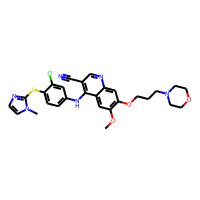
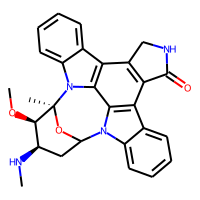
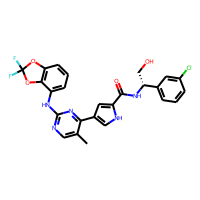
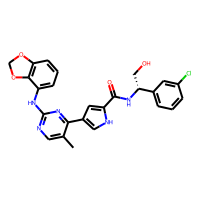
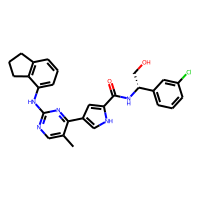

In [ ]:
active_df.head()

In [ ]:
decoy_df = pd.read_csv("mk01/decoys_final.ism",header=None,sep=" ")
decoy_df.columns = ["SMILES","ID"]
decoy_rows, decoy_cols = decoy_df.shape
decoy_df["label"] = ["Decoy"]*decoy_rows
PandasTools.AddMoleculeColumnToFrame(decoy_df,"SMILES","Mol")
add_property_columns_to_df(decoy_df)

In [ ]:
tmp_df = active_df.append(decoy_df,sort=False)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


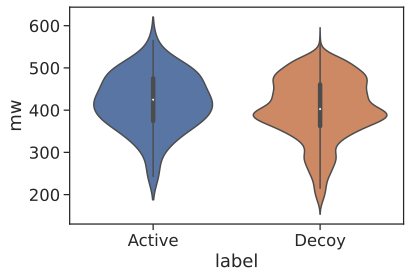

In [ ]:
sns.violinplot(tmp_df["label"],tmp_df["mw"])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


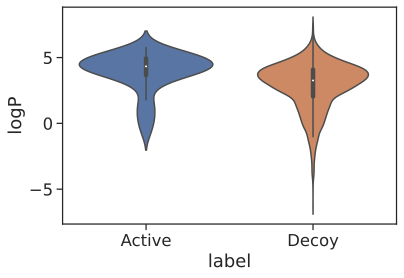

In [ ]:
sns.violinplot(tmp_df["label"],tmp_df["logP"])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


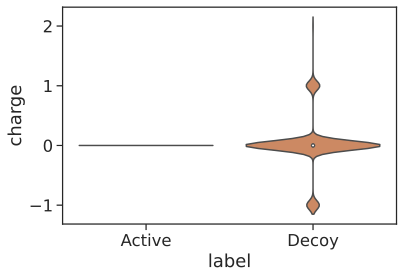

In [ ]:
sns.violinplot(tmp_df["label"],tmp_df["charge"])

In [ ]:
charged = decoy_df[decoy_df["charge"] != 0]

In [ ]:
charged.shape[0]/decoy_df.shape[0]

0.16175824175824177

In [ ]:
from neutralize import NeutraliseCharges

ModuleNotFoundError: ignored